<a href="https://colab.research.google.com/github/yardsale8/DSCI_210_R_notebooks/blob/main/lecture7_4_intro_to_ggplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [44]:
#This code expands the default plot size:
options(repr.plot.width=10, repr.plot.height=8)


#### Load example data

In [3]:
mexico_hc_spending <- read.csv("https://github.com/yardsale8/DSCI_210_R_notebooks/raw/main/data/Mexico_Health_Spending.csv")

mexico_hc_spending %>% head

Year Type      
1 1995 Government
2 1996 Government
3 1997 Government
4 1998 Government
5 1999 Government
6 2000 Government
  Spending..in.billions..2017.Purchasing.Power.Parity.Dollars.PPP...
1 25.1                                                              
2 25.7                                                              
3 28.4                                                              
4 31.2                                                              
5 34.4                                                              
6 36.6

### Yuck!  Let's clean up the spending column name!

#### Step 1 - Use `names` to identify the current name.

Use `names` to see the column names, then copy-and-paste to grab the name from the output.

In [4]:
mexico_hc_spending %>% names

[1] "Year"                                                              
[2] "Type"                                                              
[3] "Spending..in.billions..2017.Purchasing.Power.Parity.Dollars.PPP..."

#### Step 2 - Use `rename` to clean up the name.

**Syntax.**

```{R}
...
%>% rename(new_name1 = old_name1,
           new_name2 = old_name2,
           ...
           )
...
```

In [5]:
(mexico_hc_spending
 %>% rename(Spending = Spending..in.billions..2017.Purchasing.Power.Parity.Dollars.PPP...)
) -> mexico_hc_spending

mexico_hc_spending %>% head

Year Type       Spending
1 1995 Government 25.1    
2 1996 Government 25.7    
3 1997 Government 28.4    
4 1998 Government 31.2    
5 1999 Government 34.4    
6 2000 Government 36.6

# Introduction to `ggplot`

In this notebook, we will
1. Review the grammar of graphics and graphical specifications,
2. Show how the graphical specification can be implemented in `ggplot`, and
3. Show how some modifiers are implemented in `ggplot`.

## Topic 1 - Review of the grammar of graphics and graphical specifications

### What is a data visualization?

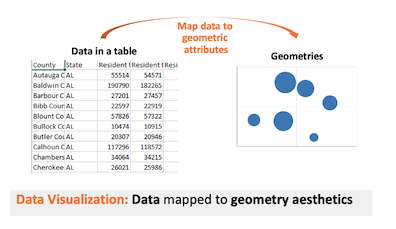

### Describing a visualization via a graphical specification

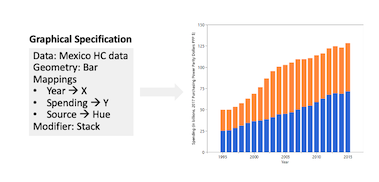

### Three more graphical specifications

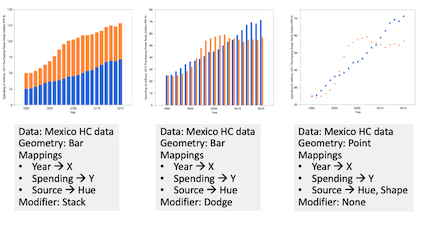

## Topic 2 - Implementing a graphical specification with `ggplot`

The `R` library `ggplot` (part of `tidyverse`)

1. Implements the Grammar of Graphics [i.e., the `"gg"` in `ggplot`], and
2. Easily maps to our graphical specifications.

### Comparing a graphical specification to `ggplot` code
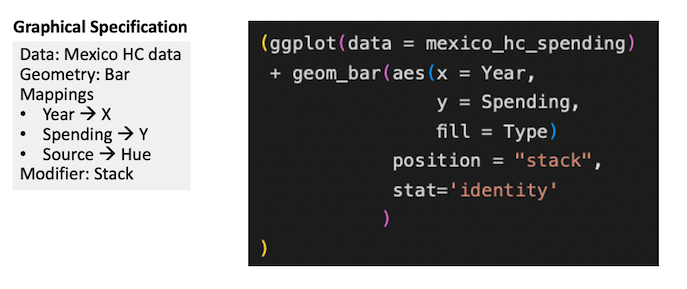

### How `ggplot` code relates to the graphical specification
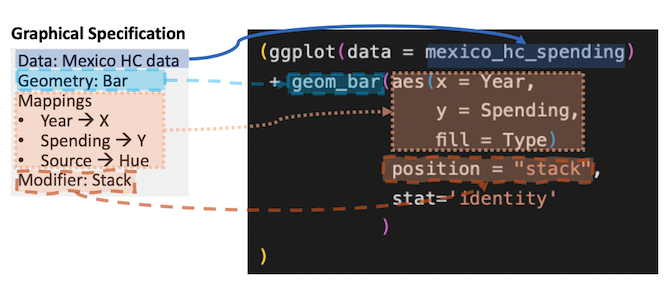

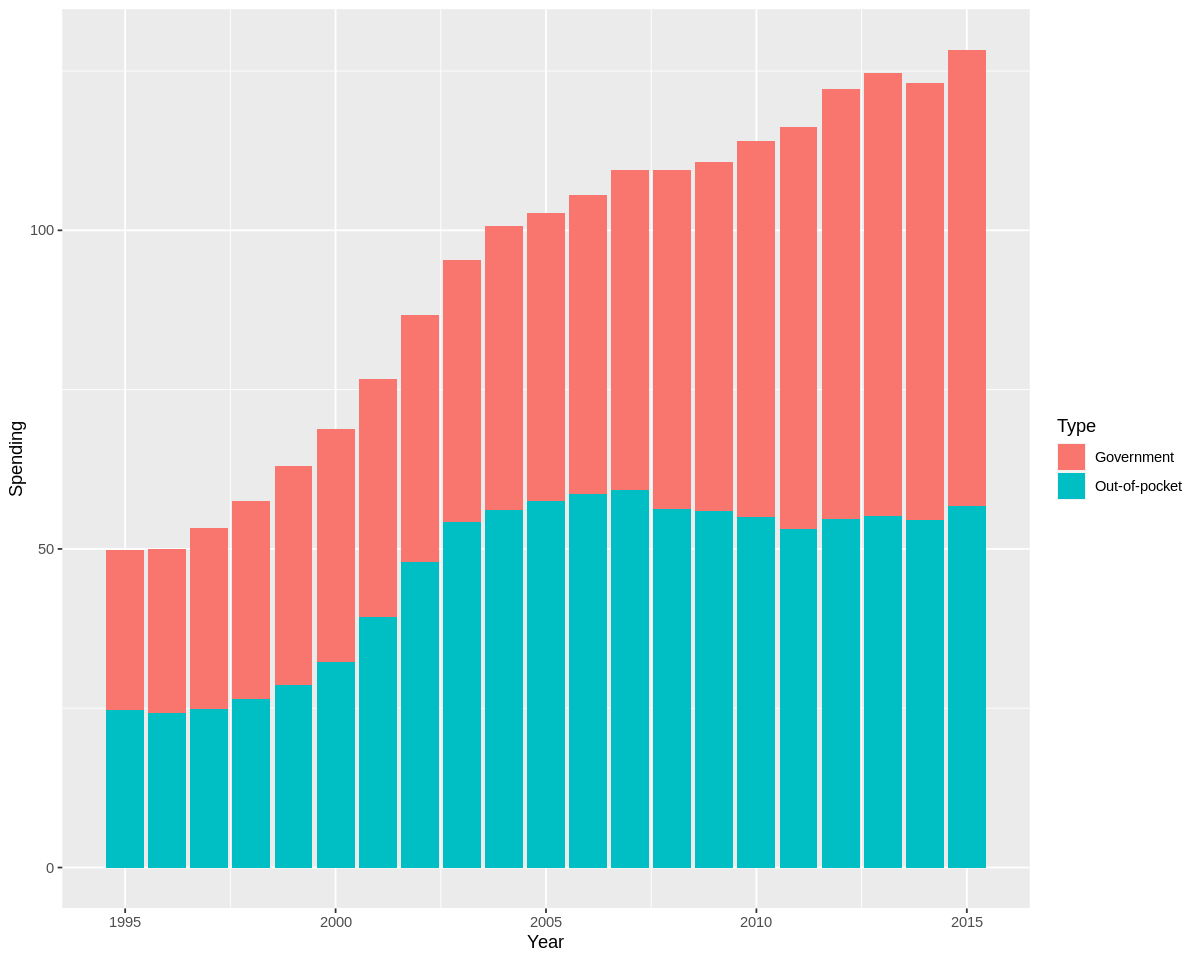

In [61]:
(ggplot(data = mexico_hc_spending)
 + geom_bar(aes(x = Year,                    # Use `aes` to define mappings as first argument
                y = Spending,
                fill = Type),
            position = "stack",
            stat='identity'                 # Use this when mapping a value to y
           )
)

## <font color="red"> Exercise 7.4.1 </font>

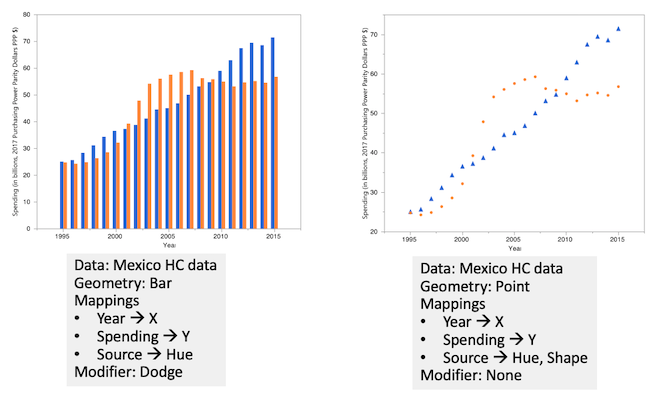

**Task.** Use `ggplot` to create the graphs shown above.

**Hints.**
1. **Left-hand Plot.** Use `?geom_bar` to determine how to set the jitter to dodge, and
2. **Right-hand Plot.** Change the geometry and add any additional mappings [found under help for the geometry function].

In [ ]:
?geom_bar # Run to get help on `geom_bar`

In [14]:
# Your code for visualization 1 here.

In [ ]:
?geom_point # Run to get help on `geom_point`

In [15]:
# Your code for visualization 2 here.

## Topic 3 - Additional topics

Finally, we will discuss some additional topics that will allow you to take your plots to the next level.

1. Layer multiple geometries on the same plot.
2. Adding facets to plots with `facet_grid`
3. Preprocessing the data.
3. Creating small multiples using `facet_wrap`
4. Plotting an aggregation.



## Topic 3.1 - Layering multiple geometries on the same plot

`ggplot` makes it easy to layer/overlay multiple geometries on the same plot, simply add each geometry to your `ggplot` `+` chain.

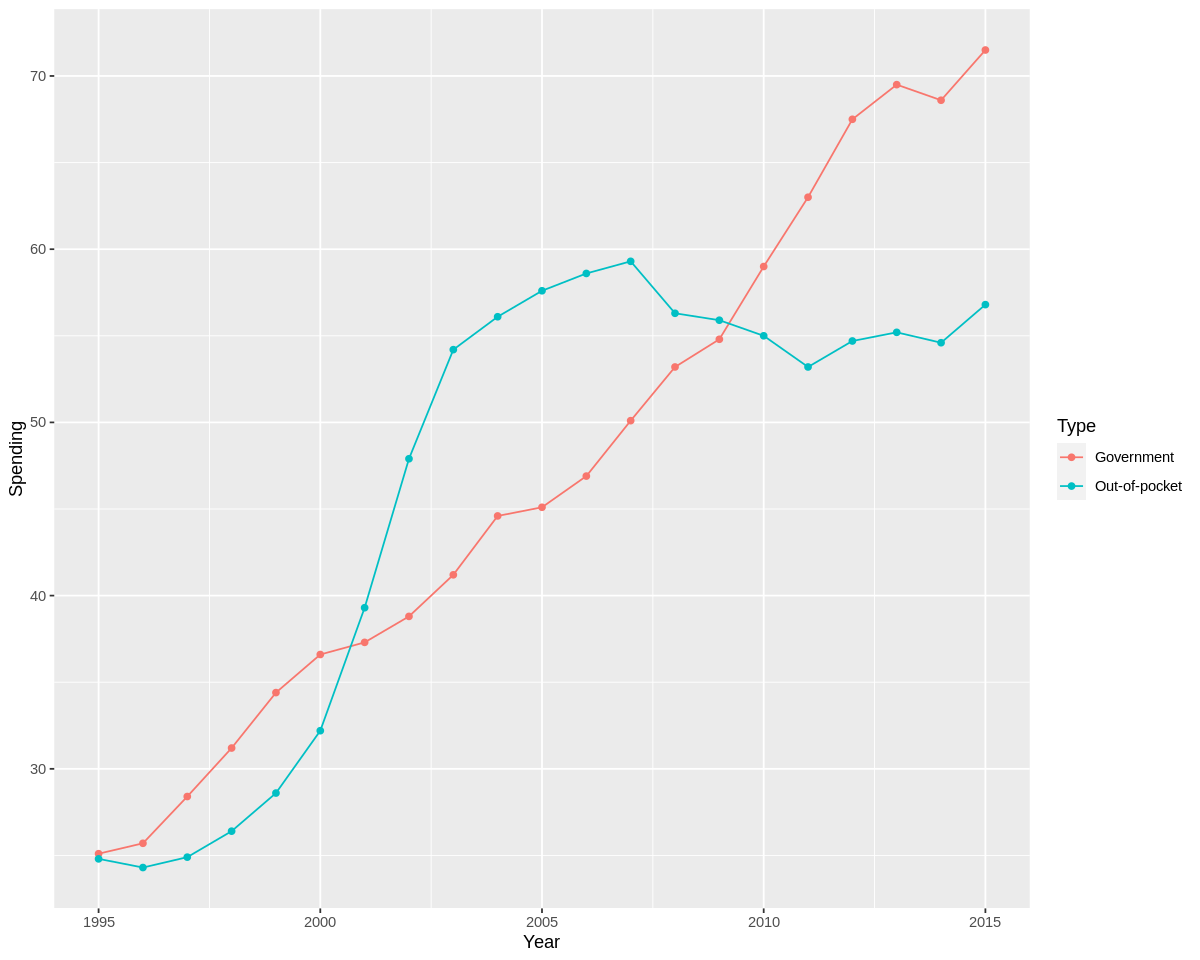

In [28]:
(ggplot(data = mexico_hc_spending)
 + geom_line(aes(x = Year,
                 y = Spending,
                 color = Type))
 + geom_point(aes(x = Year,
                  y = Spending,
                  color = Type))
)

#### Important!  Order of your `+` chain impacts of the layers

Note that `ggplot` "paints" each layer in the specified order.  Let's illustrate with two adaptations of the last plot.  Note that we increase the size of both geometries and change the points to black to add clarity.

**"Painting" the lines first.**

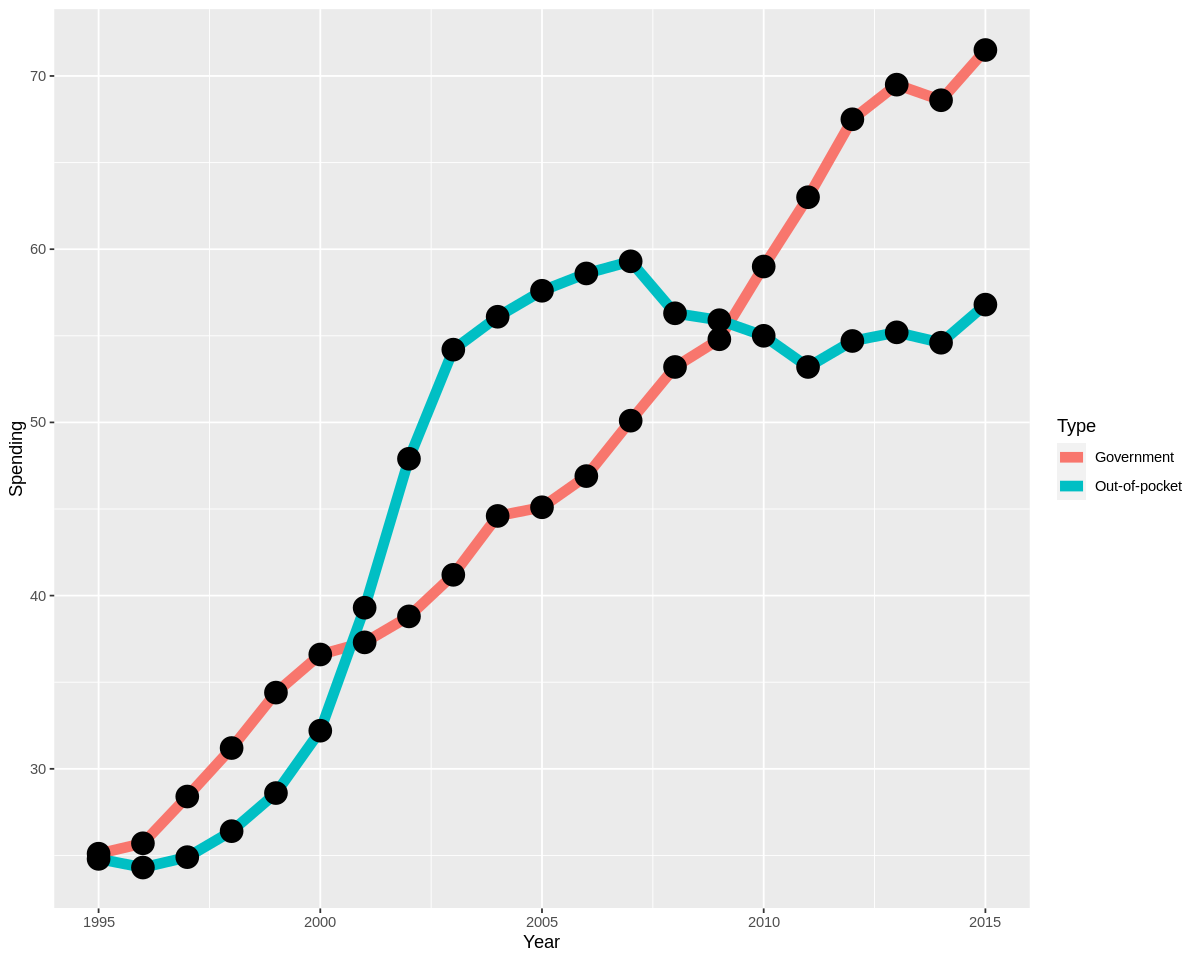

In [29]:
(ggplot(data = mexico_hc_spending)
 + geom_line(aes(x = Year,
                 y = Spending,
                 color = Type),
                 size = 3)
 + geom_point(aes(x = Year,
                  y = Spending),
                  color = "black",
                  size = 6)
)


**"Painting" the points first.**

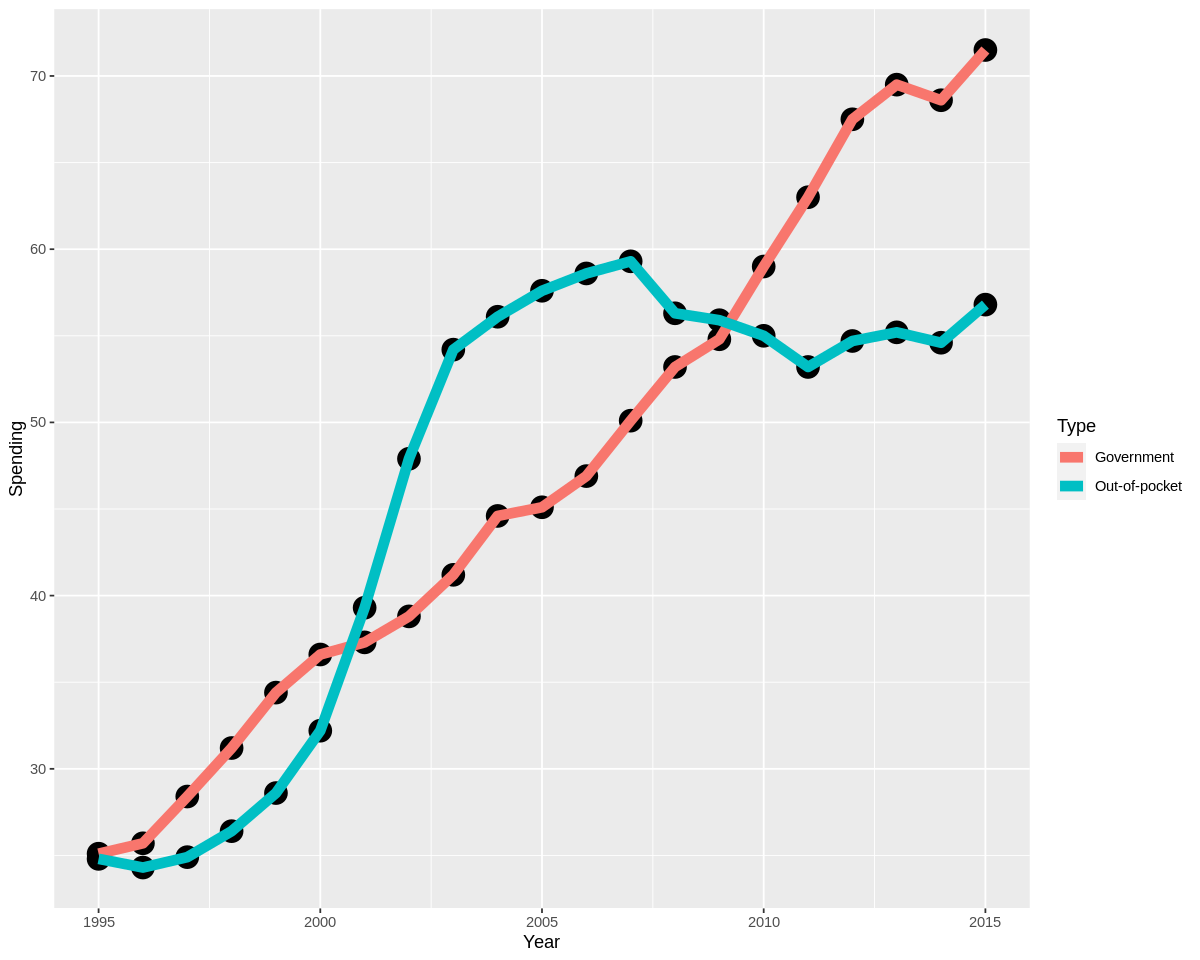

In [30]:
(ggplot(data = mexico_hc_spending)
 + geom_point(aes(x = Year,
                  y = Spending),
                  color = "black",
                  size = 6)
 + geom_line(aes(x = Year,
                 y = Spending,
                 color = Type),
                 size = 3)
)


## <font color="red"> Exercise 7.4.2 </font>

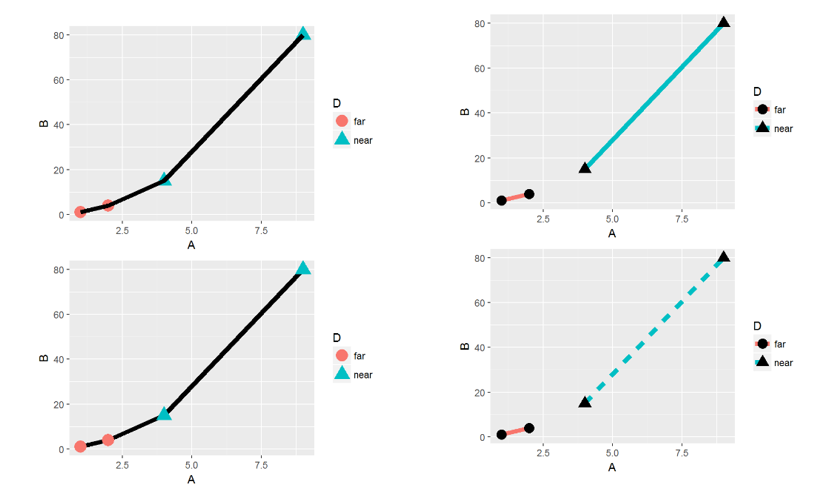

**Task.** Create each of the graphs shown above.

In [62]:
toy_data <- data.frame(A = c(2,1,4,9),
                       B  = c(4,1,15,80),
                       C = c(1,2,3,4),
                       D = c('far','far','near','near'))
toy_data

A B  C D   
1 2  4 1 far 
2 1  1 2 far 
3 4 15 3 near
4 9 80 4 near

In [32]:
# Code for plot 1

In [33]:
# Code for plot 2

In [34]:
# Code for plot 3

In [35]:
# Code for plot 4

## Topic 3.2 - Faceting in `ggplot`

To facet a visualization, we use one of the following at the end of the `ggplot` code.
1. `+ facet_grid(rows = vars(col_name)))` to facet Y,
2. `+ facet_grid(cols = vars(col_name))` to facet X,
3. `+ facet_grid(cols = vars(col1), rows = vars(col2)` to facet both X and Y,

#### Load example data

In [23]:
births <- read.csv('https://github.com/yardsale8/DSCI_210_R_notebooks/raw/main/data/NC_Birth.csv')

births %>% head

Father.Minority Father.Age Father.Years.of.Education Mother.Minority
1 Nonwhite        50         12                        White          
2 White           19          9                        White          
3 White           37         17                        White          
4                 NA         NA                        Nonwhite       
5 Nonwhite        39         11                        Nonwhite       
6 White           20         11                        Nonwhite       
  Mother.Age Mother.Years.of.Education Marital.Status Mother.Smoker
1 24         15                        Unmarried      N            
2 18          9                        Unmarried      Y            
3 35         17                        Married        N            
4 22         14                        Unmarried      N            
5 31         16                        Unmarried      N            
6 19         12                        Unmarried      N            
  Mother.Avg.Cigs Mother.Weight.Gain ⋯ Month.of.Birth Day.of.Birth Gender
1  0              50                 ⋯  2             23           Female
2 23              35                 ⋯  1             25           Female
3  0              24                 ⋯  1             25           Female
4  0              33                 ⋯ 11             10           Male  
5  0              30                 ⋯  5             18           Female
6  0              10                 ⋯ 11              6           Male  
  Number.of.Prenatal.Visits Kotelchuck.Index.for.Adequacy.of.Prenatal.Care
1 10                        3_Adequate                                    
2 9                         3_Adequate                                    
3 20                        4_AdequatePlus                                
4 15                        4_AdequatePlus                                
5 12                        1_Inadequate                                  
6 10                        4_AdequatePlus                                
  Gestational..Age Birth.Weight..Grams. Low.Birth Apgar.Score...One.Minute
1 38               2866                 N         9                       
2 35               3121                 N         8                       
3 38               2667                 N         8                       
4 38               2696                 N         8                       
5 38               2979                 N         4                       
6 36               3036                 N         9                       
  Apgar.Score...Five.Minutes
1 9                         
2 9                         
3 9                         
4 9                         
5 9                         
6 9

#### Example 1 - Facet Y by `Mother Smoker`
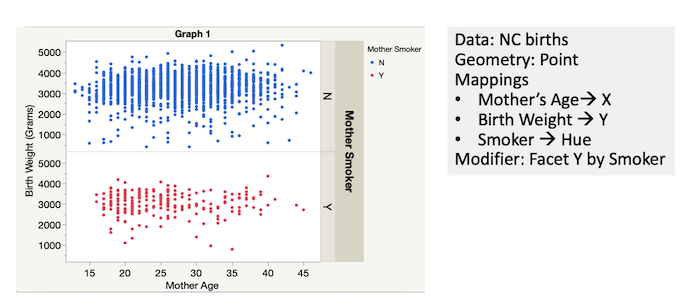

#### Original attempt

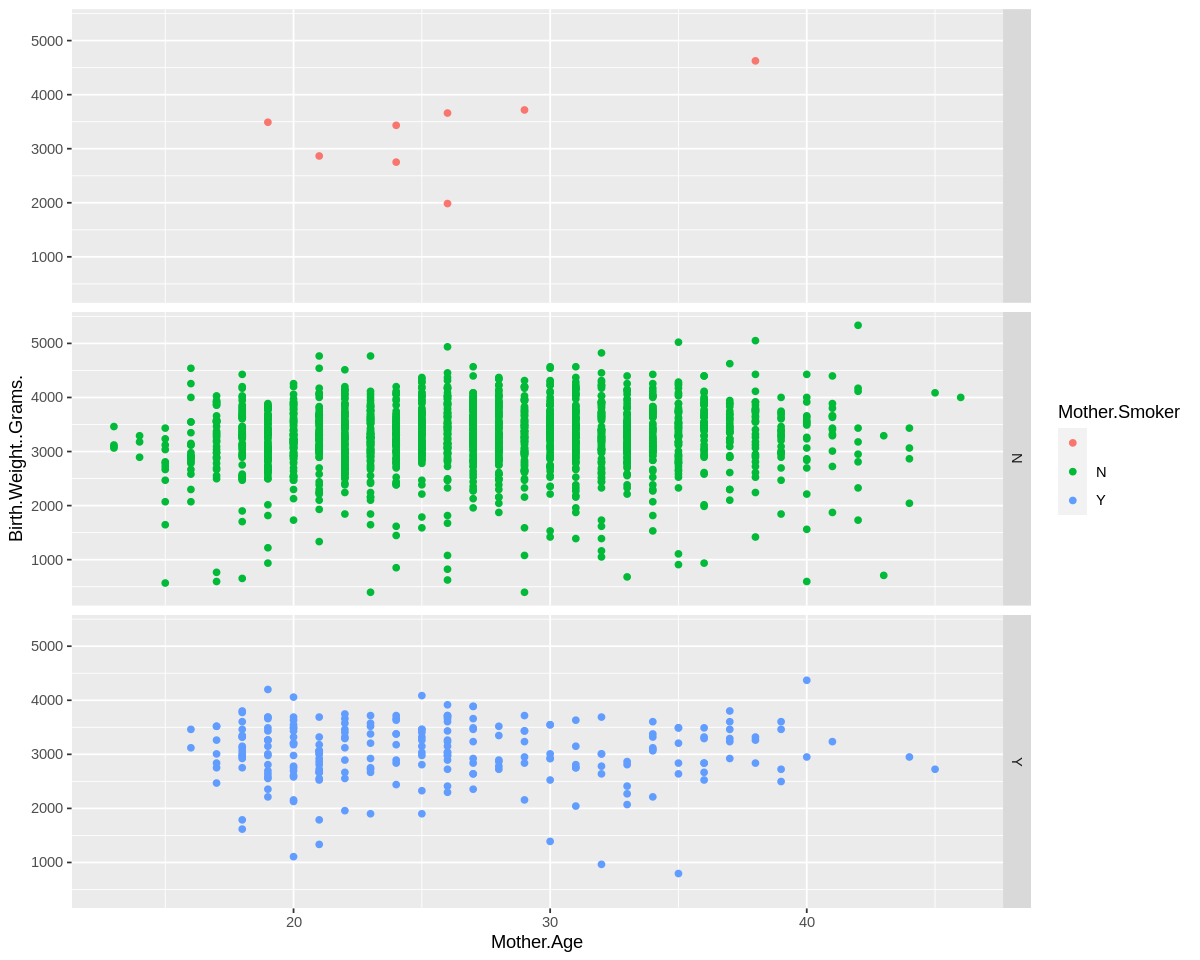

In [31]:
 (ggplot(data = births)
 + geom_point(aes(x = Mother.Age,
                  y = Birth.Weight..Grams.,
                  color = Mother.Smoker)
             )
 + facet_grid(rows = vars(Mother.Smoker))
 )


Well, those missing values certainly are annoying!

### Topic 3.3 - Preprocessing data

The last example illustrated the need to preprocess the data as part of a data visualization.  In fact, [Leland Wilkinson](https://en.wikipedia.org/wiki/Leland_Wilkinson)--creator of the [Grammar of Graphics](https://www.amazon.com/Grammar-Graphics-Statistics-Computing/dp/0387245448/)--considered data processing tools a vital part of a graphics library.



#### Common reasons to preprocess the data

Creating a meaningful visualization often requires some preprocessing of the data:
1. Adding a local data filter,
2. Cleaning up some text columns,
3. Performing a custom aggregation (e.g., computing a per-capita rate), or
4. Reshaping the table [Coming soon!]

#### How to preprocess data in a `ggplot` chain.

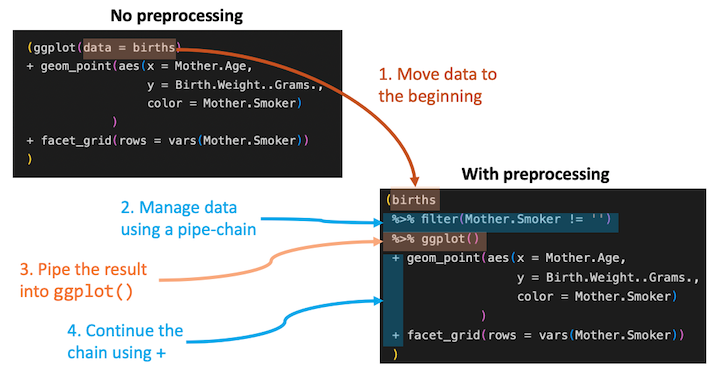

#### Example - Removing missing `Mother.Smoker` by adding a `filter`

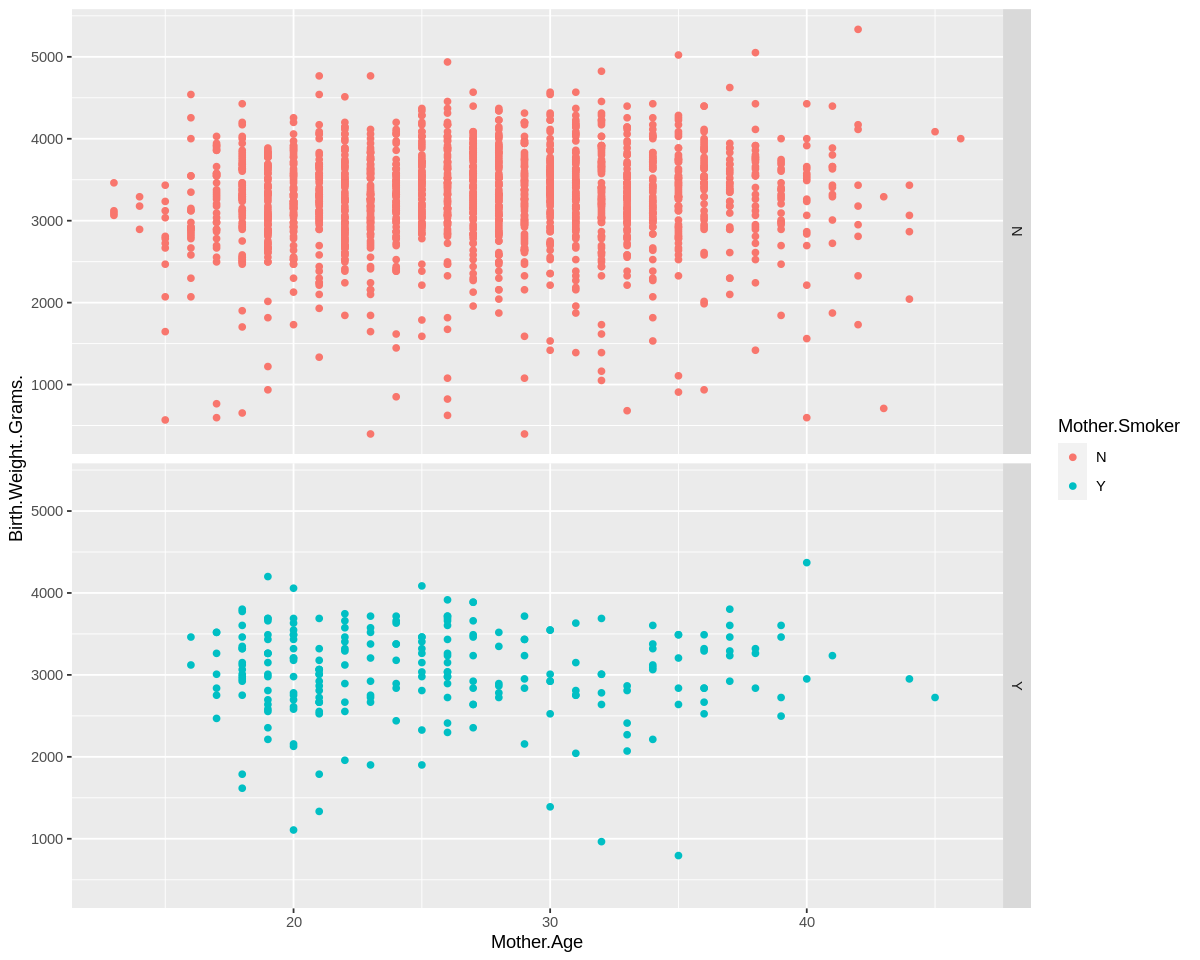

In [45]:
(births                                      # When preprocessing, start with the data
 %>% filter(Mother.Smoker != '')              # Preprocessing steps go here
 %>% ggplot()                                # Pipe data into ggplot
 + geom_point(aes(x = Mother.Age,
                  y = Birth.Weight..Grams.,
                  color = Mother.Smoker)
             )
 + facet_grid(rows = vars(Mother.Smoker))
 )

## <font color="red"> Exercise 7.4.3 </font>

Create a visualization with the following specifiction.

**Data.** NC Births

**Preprocessing.** Convert the birth weights to pounds.

**Geometry.** Point

**Mappings.**

* Gestational Age $\longrightarrow$ X
* Birth Weight in lb. $\longrightarrow$ Y
* Mother Smoker $\longrightarrow$ Shape
* Mother Education $\longrightarrow$ Color

**Modifiers.**

* Facet X by Mother Smoker
* Filter out any missing/empty labels.

Do all of this in a single chain.

In [41]:
# Your code here

## Topic 3.4 - Creating small multiples with `facet_wrap`

When you want to visualize difference between a large number of categories, use [small multiples](https://en.wikipedia.org/wiki/Small_multiple#:~:text=A%20small%20multiple%20(sometimes%20called,was%20popularized%20by%20Edward%20Tufte.) using `facet_wrap`.

**Loading the World Bank data**

In [19]:
world_bank <- read.csv('https://github.com/yardsale8/DSCI_210_R_notebooks/raw/main/data/World_Bank_Clean.csv')

world_bank %>% head

Region Country Scandinavia Year CO2_metric_tons_per_capita
1 Africa Algeria No          1960 0.5537636                 
2 Africa Algeria No          1961 0.5318100                 
3 Africa Algeria No          1962 0.4849537                 
4 Africa Algeria No          1963 0.4528245                 
5 Africa Algeria No          1964 0.4595689                 
6 Africa Algeria No          1965 0.5224485                 
  Fertility_Rate_births_per_woman GDP_per_capita Internet_per_100
1 7.524                           2466.798       NA              
2 7.573                           2078.863       NA              
3 7.614                           1628.891       NA              
4 7.646                           2133.978       NA              
5 7.665                           2201.492       NA              
6 7.675                           2276.849       NA              
  Life_exp_birth Total_Population
1 46.13512       11124892        
2 46.59032       11404859        
3 47.04500       11690152        
4 47.49620       11985130        
5 47.94190       12295973        
6 48.37610       12626953

#### Example - Fertility over time by country - No `facet_wrap`

#### Step 1 - Make sure we get the correct fields and labels.

In [37]:
# Inspect column names
world_bank %>% names

[1] "Region"                          "Country"                        
 [3] "Scandinavia"                     "Year"                           
 [5] "CO2_metric_tons_per_capita"      "Fertility_Rate_births_per_woman"
 [7] "GDP_per_capita"                  "Internet_per_100"               
 [9] "Life_exp_birth"                  "Total_Population"

In [63]:
# Inspect unique region labels
world_bank$Region %>% unique

[1] "Africa"       "Asia"         "Europe"       "Middle East"  "Oceania"     
[6] "The Americas"

Warning message:
“Removed 355 rows containing missing values (`geom_line()`).”


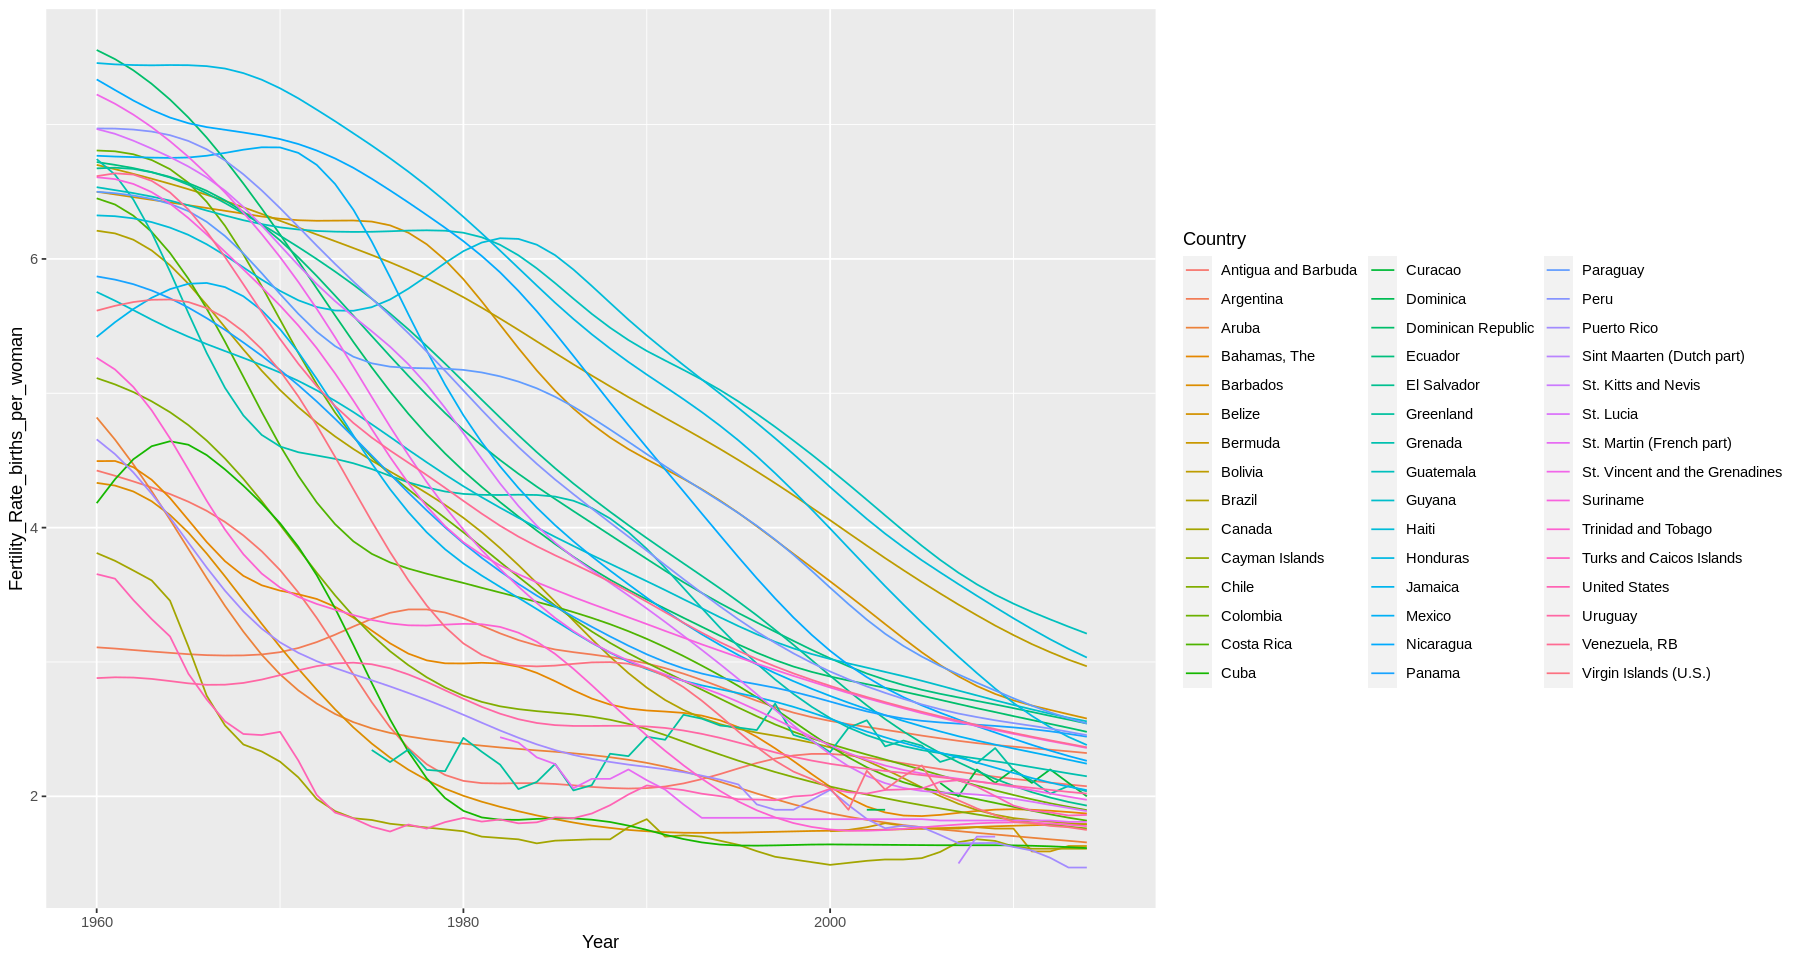

In [40]:
#This code expands the default plot size:
options(repr.plot.width=15, repr.plot.height=8)

(world_bank
 %>% filter(Region == 'The Americas')
 %>% ggplot()
 + geom_line(aes(x = Year,
                 y = Fertility_Rate_births_per_woman,
                 color = Country))
# + facet_wrap(~Country)
)

Warning message:
“Removed 355 rows containing missing values (`geom_line()`).”


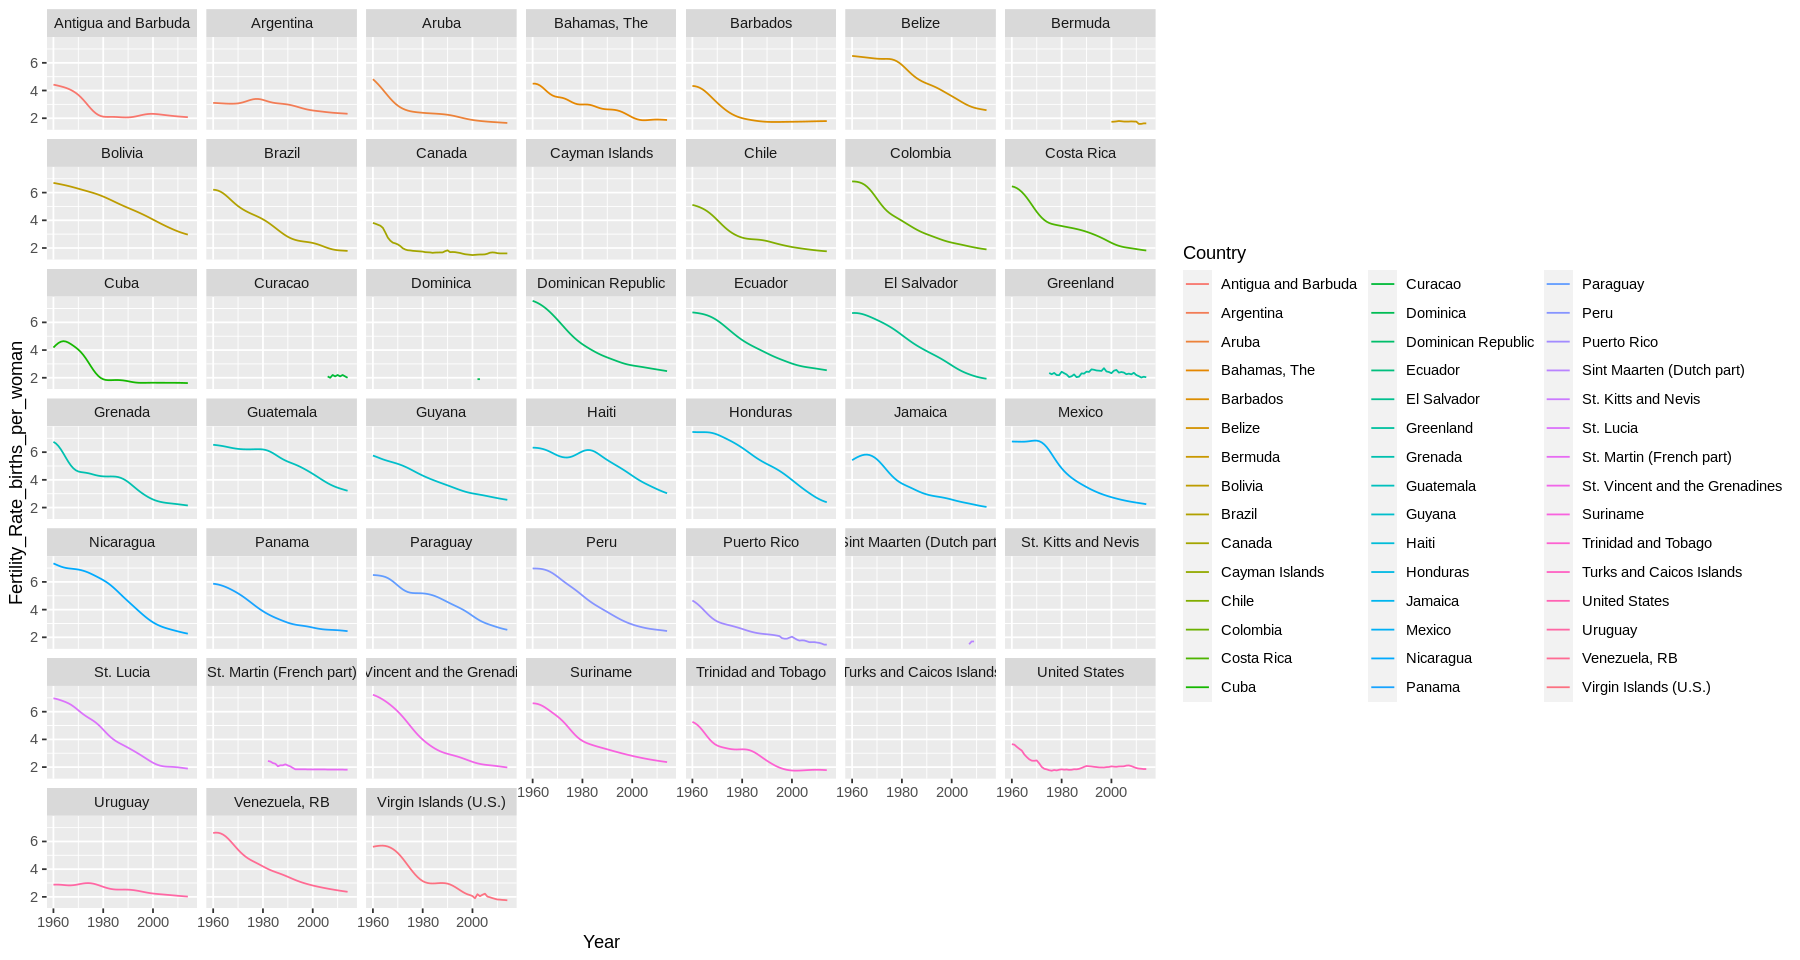

In [39]:
#This code expands the default plot size:
options(repr.plot.width=15, repr.plot.height=8)

(world_bank
 %>% filter(Region == 'The Americas')
 %>% ggplot()
 + geom_line(aes(x = Year,
                 y = Fertility_Rate_births_per_woman,
                 color = Country))
+ facet_wrap(~Country)
)

## <font color="red"> Exercise 7.4.4 </font>

Create small multiples to visualize the life expectancies (Y) by the year (X) for each country (wrap) in Europe (filter).  Do all of this in one pipe/`+` chain.

In [46]:
# Your code here.

## Topic 3.4 - Plotting an aggregation

Recall that we often want to plot an aggregated value to clean/clarify the visualization

### Bar graphs: The most basic aggregation

The most common aggregation is assigning the row count to the Y axis in a bar graph.  This can be accomplished using `stat='count'` in `geom_bar`

#### Example 1 - Counts for `Mother.Smoker`

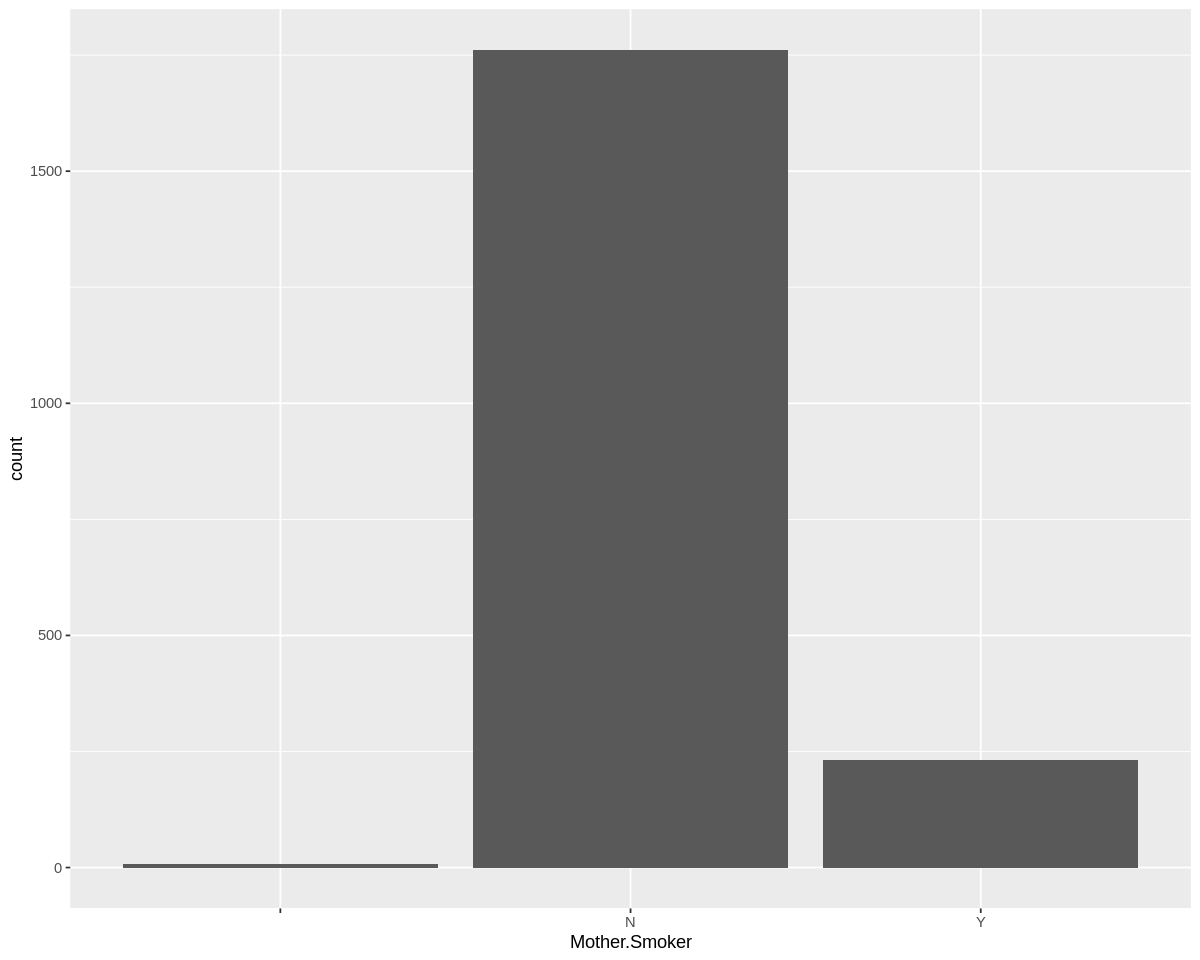

In [52]:
(births
 %>% ggplot()
  + geom_bar(aes(x = Mother.Smoker),
             stat = 'count'
            )
   )

#### Example 2 - Counting combinations of `Low.Birth` and `Gender`

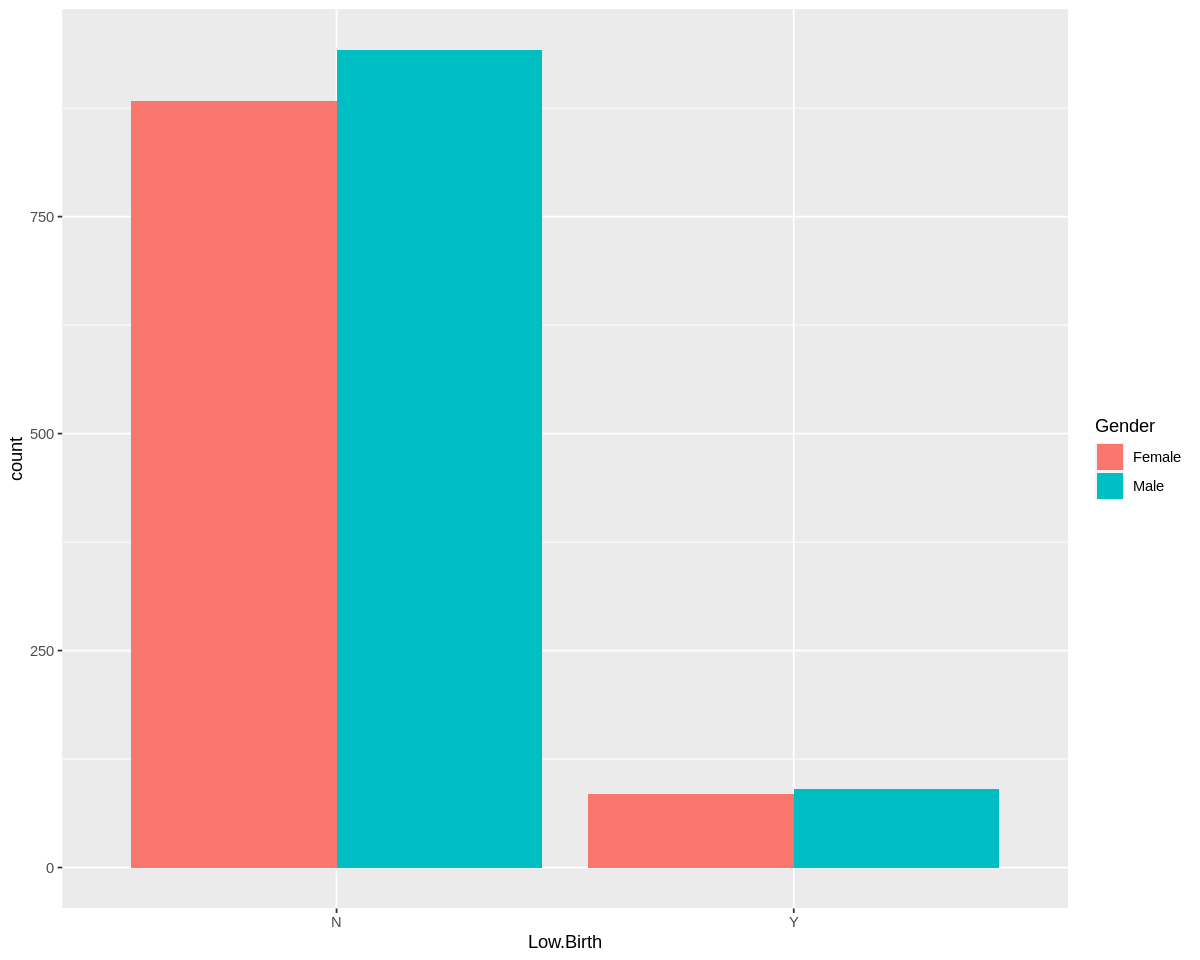

In [56]:
(births
 %>% ggplot()
  + geom_bar(aes(x = Low.Birth,
                 fill = Gender),
             stat = 'count',
             position = 'dodge'
            )
   )

### Aggregating numeric fields

Next, we will look at plotting aggregated numeric fields.

### Bad Plots

Warning message:
“Removed 1029 rows containing missing values (`geom_point()`).”


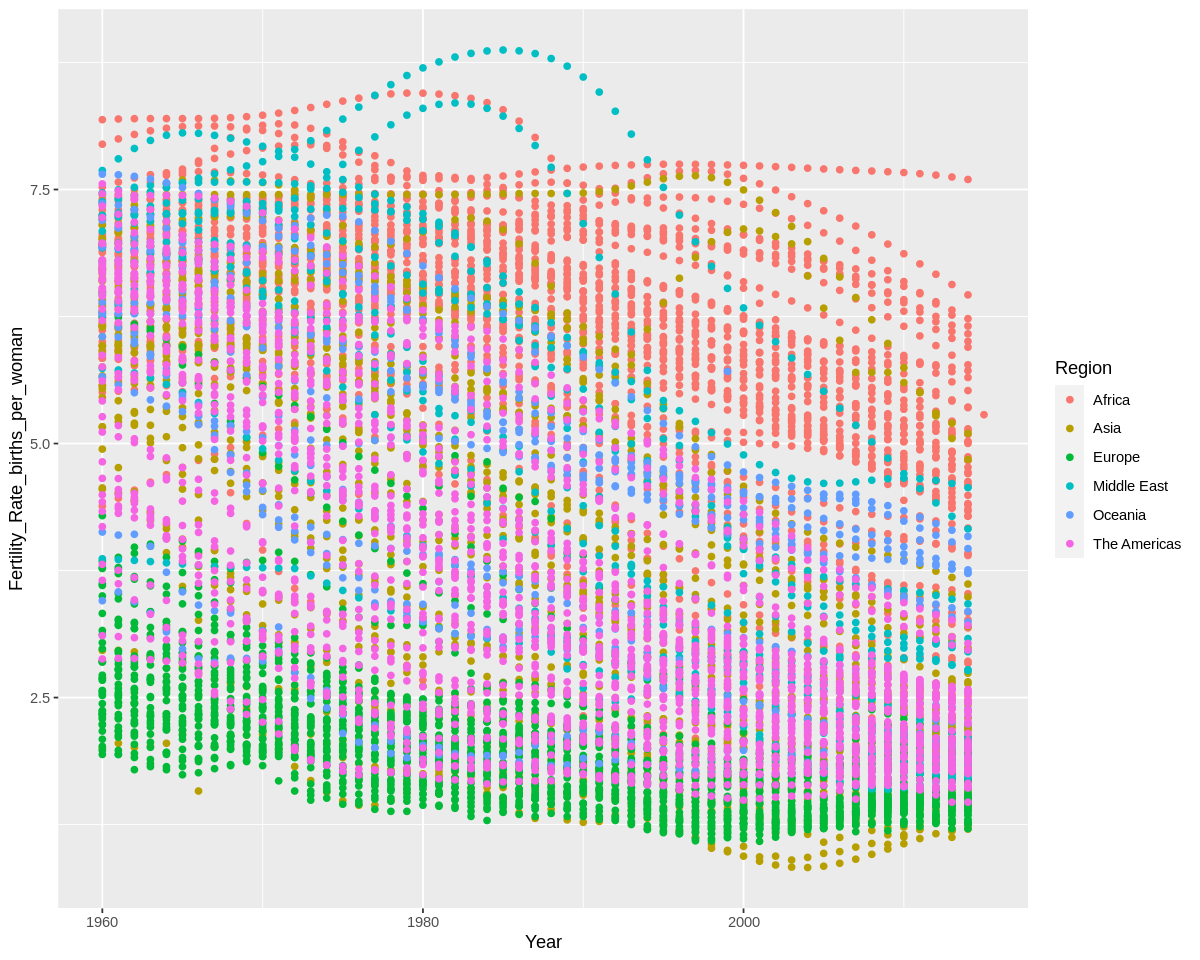

In [48]:
# Bad plot 1
(world_bank
  %>% ggplot()
  + geom_point(aes(x = Year,
                   y = Fertility_Rate_births_per_woman,
                   color = Region)
              )
)

Warning message:
“Removed 155 rows containing missing values (`geom_line()`).”


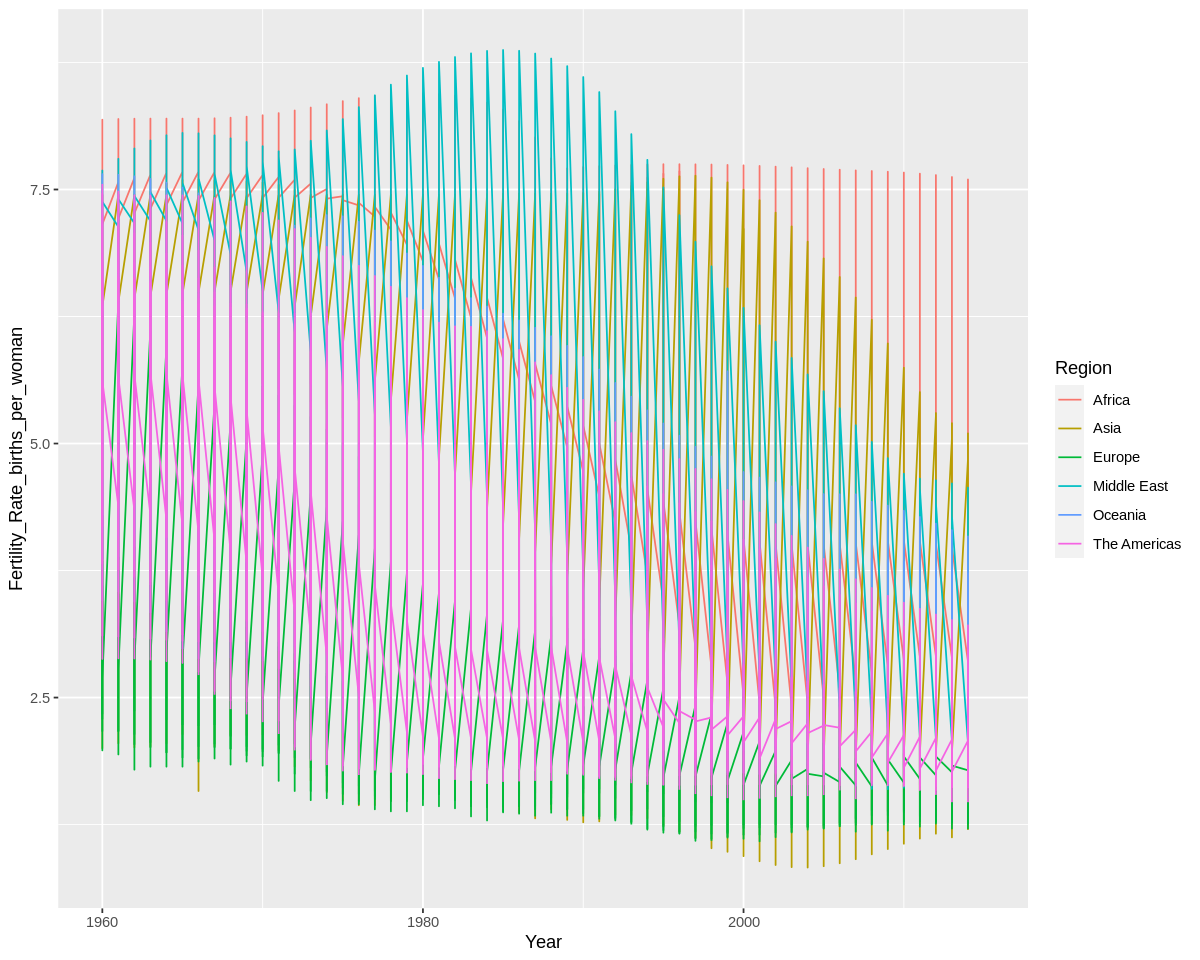

In [49]:
# Bad plot 2
(world_bank
  %>% ggplot()
  + geom_line(aes(x = Year,
                  y = Fertility_Rate_births_per_woman,
                  color = Region)
             )
)

### Manually aggregation

1. Use `summarise` to perform each aggregation (e.g., the things you want as *Measures* in Tableau), while
2. Group by all the other fields included in the plot.

#### Better Graphs with Aggregation

To clean up the previous plots, we want to
1.   Plot the *average* fertility $\longrightarrow$ compute with `summarize`, while
2.   Plotting year (X) and Region (Color) $\longrightarrow$ group by these.

Finally, we need to make sure we use the name of the new aggregated field in a `ggplot aes` specification.


Warning message:
“Removed 5 rows containing missing values (`geom_point()`).”


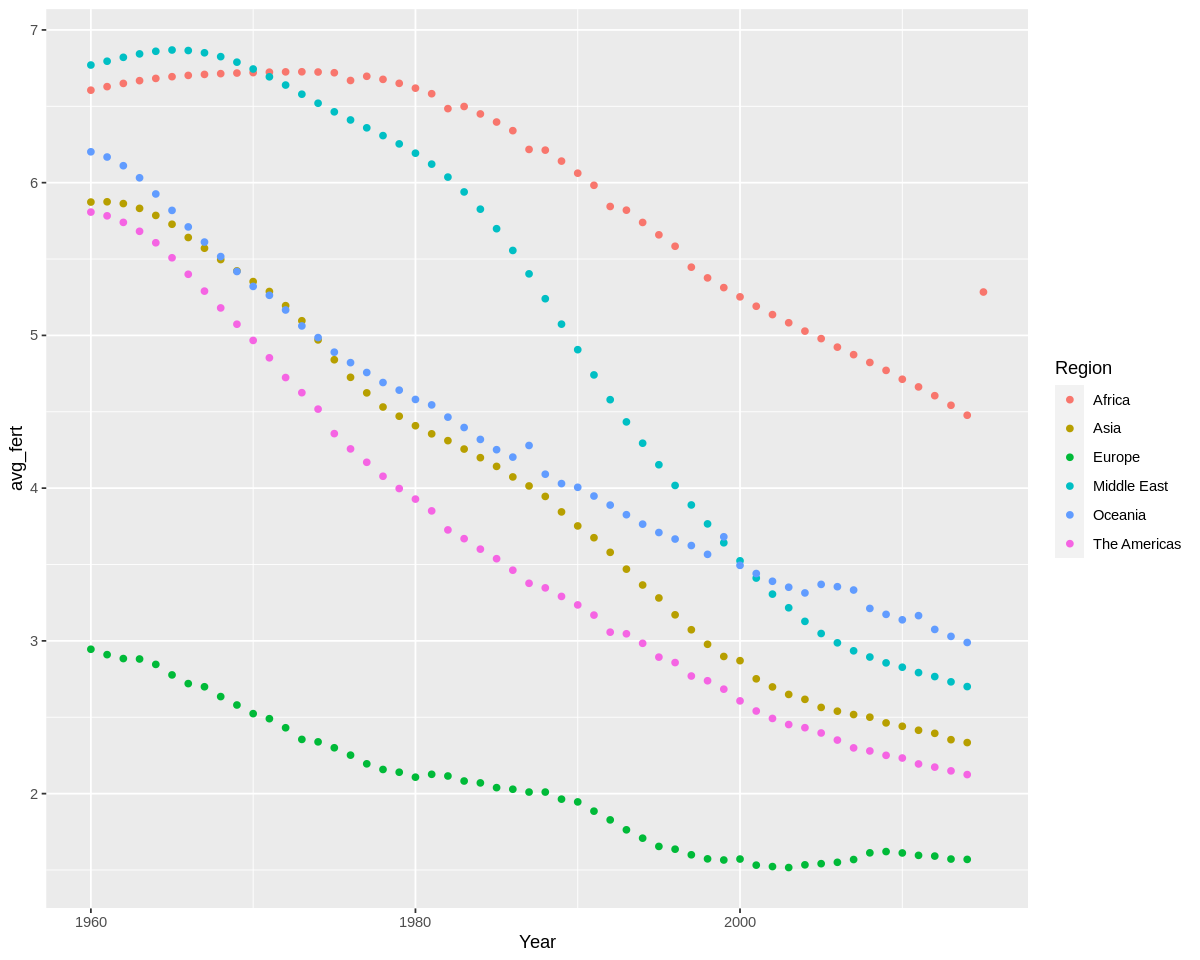

In [57]:
(world_bank
  %>% summarise(avg_fert = mean(Fertility_Rate_births_per_woman,
                                na.rm = TRUE),
                .by = c(Year, Region)
               )
  %>% ggplot()
  + aes(x = Year,
        y = avg_fert,
        color = Region)
  + geom_point()
)

Warning message:
“Removed 5 rows containing missing values (`geom_line()`).”


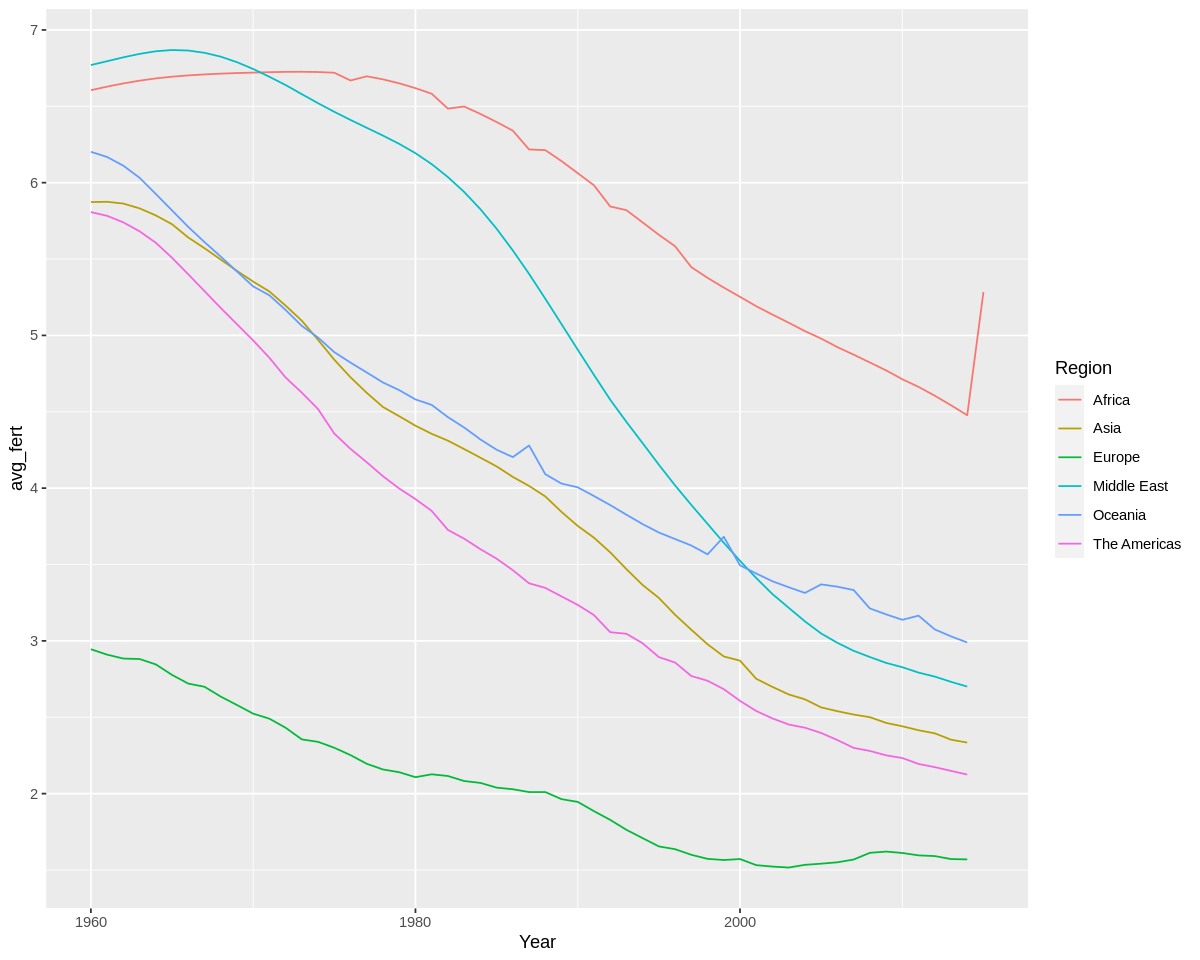

In [58]:
(world_bank
  %>% summarise(avg_fert = mean(Fertility_Rate_births_per_woman,
                                na.rm = TRUE),
                .by = c(Year, Region)
               )
  %>% ggplot()
  + aes(x = Year,
        y = avg_fert,
        color = Region)
  + geom_line()
)

#### Letting `ggplot` and `stat_summary` do the work

Since plotting an aggregated field can be annoying, `ggplot` provides `stat_summary` to perform both aggregation and mapping in one function.

Warning message:
“Removed 1029 rows containing non-finite values (`stat_summary()`).”


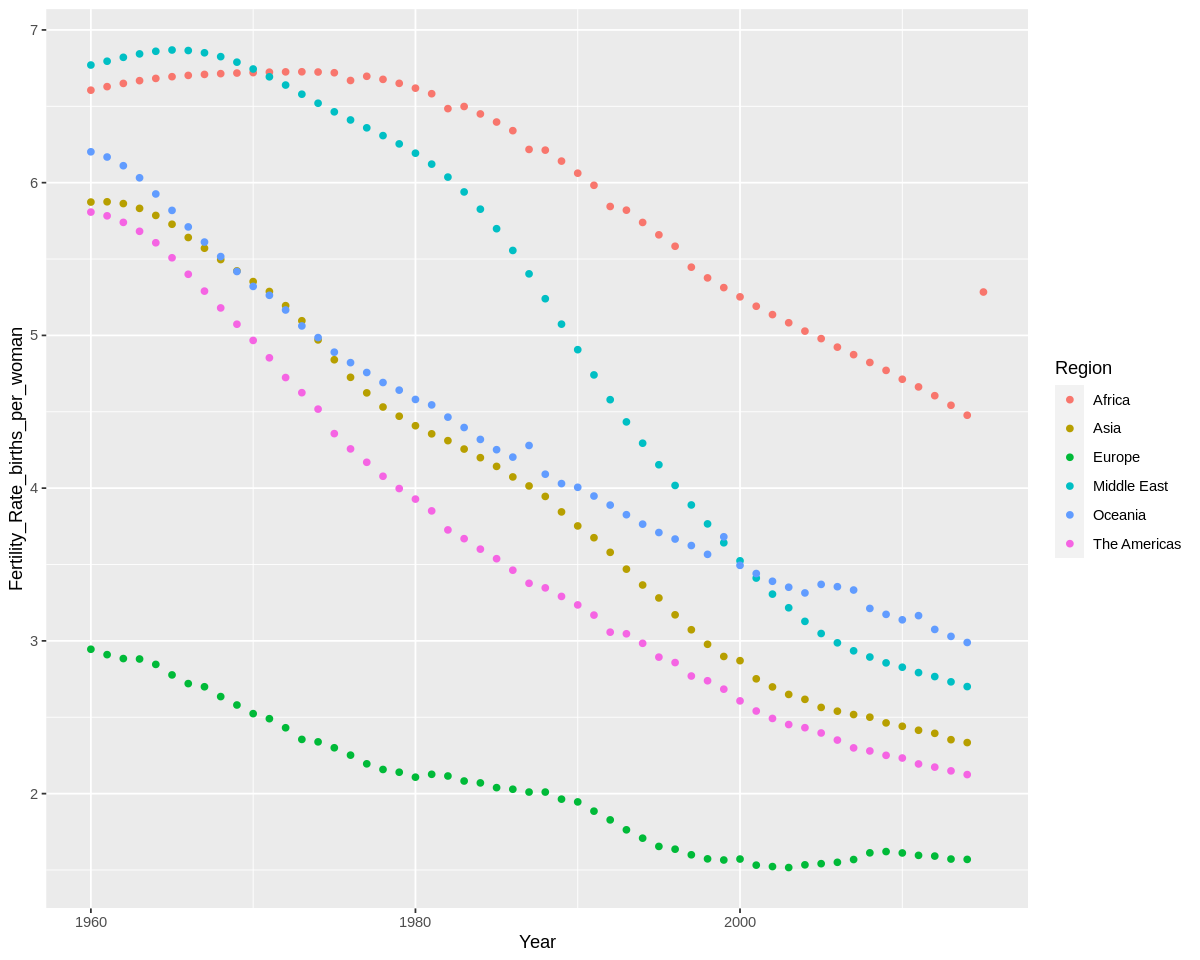

In [59]:
(ggplot(data = world_bank)
  + aes(x = Year,
        y = Fertility_Rate_births_per_woman,
        color = Region)
  + stat_summary(geom = 'point', fun = mean)
)

Warning message:
“Removed 1029 rows containing non-finite values (`stat_summary()`).”


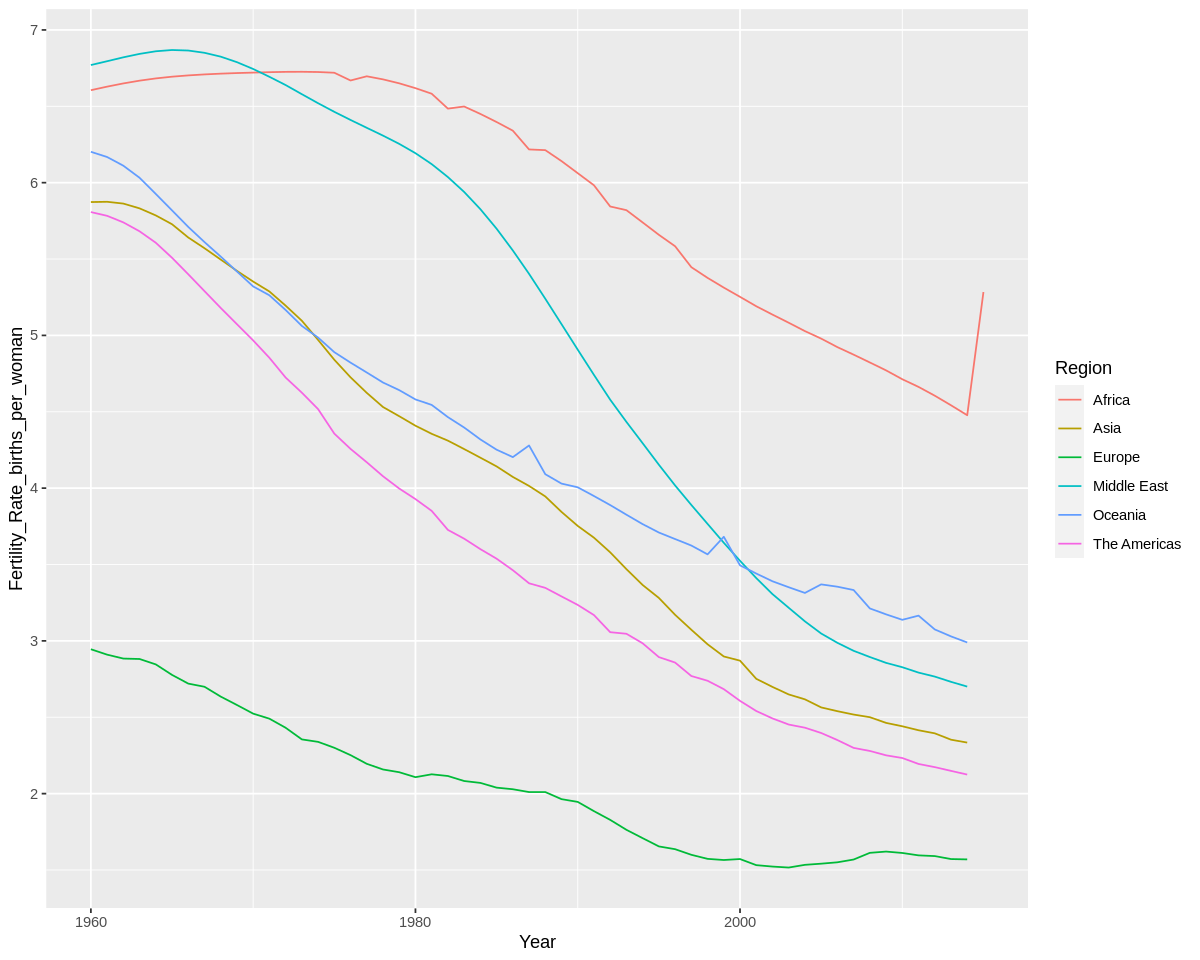

In [60]:
(ggplot(data = world_bank)
  + aes(x = Year,
        y = Fertility_Rate_births_per_woman,
        color = Region)
  + stat_summary(geom = 'line', fun = mean)
)


## <font color="red"> Exercise 7.4.5 </font>

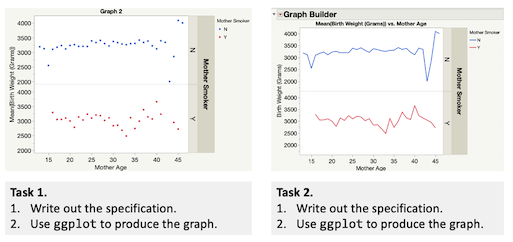

In [56]:
# Code for plot 1 here

In [57]:
# Code for plot 2 here